### https://www.kaggle.com/datasets/samuelcortinhas/house-price-prediction-seattle


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression


In [6]:
test = pd.read_csv('./test.csv')
test

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0
...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,sqft,0.30,acre,98146,3800000.0
501,3,2.5,1390.0,sqft,1570.00,sqft,98126,575000.0
502,3,2.5,2950.0,sqft,0.47,acre,98118,3105000.0
503,5,5.0,3010.0,sqft,4887.00,sqft,98115,1807000.0


In [7]:
train = pd.read_csv('./train.csv')
train

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,0.50,acre,98112,910000.0
2012,1,1.0,889.0,sqft,NaN,NaN,98121,550000.0
2013,4,2.0,2140.0,sqft,6250.00,sqft,98199,1150000.0
2014,2,2.0,795.0,sqft,NaN,NaN,98103,590000.0


In [8]:
train.describe()    #This shows the Values of the dataset.

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [9]:
train.info()  #This shows the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


<AxesSubplot:>

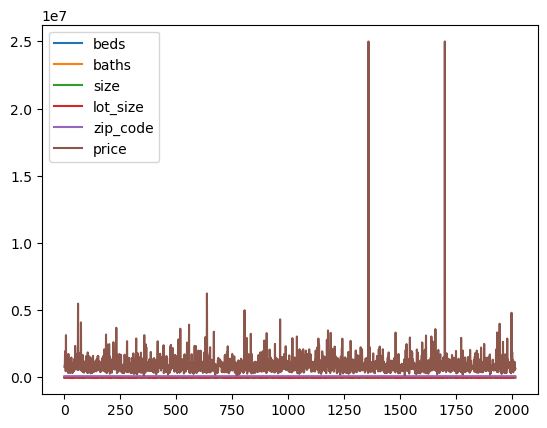

In [10]:
train.plot()

In [16]:
train.query('baths < 2 and (lot_size > 4220 )')  # Beds more  than 2 and lot size greater than 4200

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
6,1,1.0,670.0,sqft,6000.0,sqft,98133,460000.0
14,5,1.5,2560.0,sqft,5200.0,sqft,98199,1330000.0
22,2,1.0,770.0,sqft,5250.0,sqft,98133,530000.0
23,3,1.5,1280.0,sqft,9100.0,sqft,98146,625000.0
34,4,1.5,1940.0,sqft,8778.0,sqft,98118,520000.0
...,...,...,...,...,...,...,...,...
1957,2,1.0,770.0,sqft,6501.0,sqft,98125,620000.0
1978,4,1.0,1850.0,sqft,4500.0,sqft,98118,600000.0
1990,3,1.5,2200.0,sqft,4800.0,sqft,98117,860000.0
1994,2,1.0,1770.0,sqft,4800.0,sqft,98103,926000.0


In [15]:

train.query('beds < 2 and 4000 <= lot_size <= 5000')   # Beds more  than 2 and lot size less  than 4000 and greater than 5000

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
276,1,1.0,880.0,sqft,4500.0,sqft,98122,700000.0
284,1,1.0,500.0,sqft,4000.0,sqft,98168,385000.0
322,1,1.0,630.0,sqft,4895.0,sqft,98133,255000.0
1195,1,1.0,690.0,sqft,4000.0,sqft,98117,560000.0
1260,1,1.0,522.0,sqft,5000.0,sqft,98107,325000.0
1428,1,1.0,580.0,sqft,4657.0,sqft,98102,395000.0


In [17]:
train.sort_values(by='beds') #Sorting Beds by ascending

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
1456,1,1.0,889.0,sqft,NaN,NaN,98121,648888.0
1774,1,1.0,698.0,sqft,NaN,NaN,98121,399999.0
1476,1,1.0,743.0,sqft,NaN,NaN,98102,522250.0
286,1,1.0,683.0,sqft,NaN,NaN,98121,601000.0
284,1,1.0,500.0,sqft,4000.00,sqft,98168,385000.0
...,...,...,...,...,...,...,...,...
1179,9,9.0,3780.0,sqft,5020.00,sqft,98119,1210000.0
113,9,4.0,3800.0,sqft,6000.00,sqft,98116,1343000.0
1338,9,5.0,3014.0,sqft,7908.00,sqft,98178,835000.0
693,14,5.0,3884.0,sqft,4968.00,sqft,98106,1300000.0


In [18]:
train.sort_values(by='beds', ascending=False)  #Sorting Beds by descending

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
232,15,6.0,11010.0,sqft,0.33,acre,98112,3700000.0
693,14,5.0,3884.0,sqft,4968.00,sqft,98106,1300000.0
1179,9,9.0,3780.0,sqft,5020.00,sqft,98119,1210000.0
903,9,5.0,3590.0,sqft,4680.00,sqft,98117,1100400.0
113,9,4.0,3800.0,sqft,6000.00,sqft,98116,1343000.0
...,...,...,...,...,...,...,...,...
1716,1,1.0,712.0,sqft,NaN,NaN,98121,620000.0
673,1,1.0,836.0,sqft,NaN,NaN,98121,605000.0
1225,1,1.0,564.0,sqft,100.00,acre,98103,602000.0
258,1,1.0,640.0,sqft,0.35,acre,98104,345000.0


In [19]:
train.sort_values(by=['beds', 'price'], ascending=False)  #Sorting by two values

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
232,15,6.0,11010.0,sqft,0.33,acre,98112,3700000.0
693,14,5.0,3884.0,sqft,4968.00,sqft,98106,1300000.0
113,9,4.0,3800.0,sqft,6000.00,sqft,98116,1343000.0
1179,9,9.0,3780.0,sqft,5020.00,sqft,98119,1210000.0
903,9,5.0,3590.0,sqft,4680.00,sqft,98117,1100400.0
...,...,...,...,...,...,...,...,...
1902,1,1.0,557.0,sqft,NaN,NaN,98105,222000.0
1780,1,1.0,482.0,sqft,NaN,NaN,98109,220000.0
674,1,1.0,492.0,sqft,NaN,NaN,98146,205000.0
1521,1,2.0,1250.0,sqft,5183.00,sqft,98116,160000.0


In [21]:
train.isnull()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...
2011,False,False,False,False,False,False,False,False
2012,False,False,False,False,True,True,False,False
2013,False,False,False,False,False,False,False,False
2014,False,False,False,False,True,True,False,False


In [42]:
train.isnull().sum()




beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [43]:
test.interpolate()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0
...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,sqft,0.30,acre,98146,3800000.0
501,3,2.5,1390.0,sqft,1570.00,sqft,98126,575000.0
502,3,2.5,2950.0,sqft,0.47,acre,98118,3105000.0
503,5,5.0,3010.0,sqft,4887.00,sqft,98115,1807000.0


In [44]:
train.isnull().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [ ]:
# df.dropna()  this drops mission values n/a
# df.drop() drops the value in column
# df.drop(['beds', 'price'], axis=1)  this drops bed and price

In [85]:
print(test.loc[:,['baths','size']])

     baths    size
0      3.0  2850.0
1      5.0  3040.0
2      1.0  1290.0
3      2.0  2360.0
4      3.5  1942.0
..     ...     ...
500    4.5  5580.0
501    2.5  1390.0
502    2.5  2950.0
503    5.0  3010.0
504    2.0  1301.0

[505 rows x 2 columns]


In [87]:
print(test.loc[:,:'size'])

     beds  baths    size
0       3    3.0  2850.0
1       4    5.0  3040.0
2       3    1.0  1290.0
3       3    2.0  2360.0
4       3    3.5  1942.0
..    ...    ...     ...
500     5    4.5  5580.0
501     3    2.5  1390.0
502     3    2.5  2950.0
503     5    5.0  3010.0
504     3    2.0  1301.0

[505 rows x 3 columns]


In [56]:
test

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0
...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,sqft,0.30,acre,98146,3800000.0
501,3,2.5,1390.0,sqft,1570.00,sqft,98126,575000.0
502,3,2.5,2950.0,sqft,0.47,acre,98118,3105000.0
503,5,5.0,3010.0,sqft,4887.00,sqft,98115,1807000.0


In [67]:
print(test.iloc[:, ::3])  # steps of 3

     beds size_units  zip_code
0       3       sqft     98119
1       4       sqft     98106
2       3       sqft     98125
3       3       sqft     98188
4       3       sqft     98107
..    ...        ...       ...
500     5       sqft     98146
501     3       sqft     98126
502     3       sqft     98118
503     5       sqft     98115
504     3       sqft     98103

[505 rows x 3 columns]


In [60]:
print(test.iloc[:, ::2])  # steps of 2

     beds    size  lot_size  zip_code
0       3  2850.0   4200.00     98119
1       4  3040.0   5002.00     98106
2       3  1290.0   6048.00     98125
3       3  2360.0      0.28     98188
4       3  1942.0   1603.00     98107
..    ...     ...       ...       ...
500     5  5580.0      0.30     98146
501     3  1390.0   1570.00     98126
502     3  2950.0      0.47     98118
503     5  3010.0   4887.00     98115
504     3  1301.0   3000.00     98103

[505 rows x 4 columns]


In [96]:
print(test.loc[:,:'size'])

     beds  baths    size
0       3    3.0  2850.0
1       4    5.0  3040.0
2       3    1.0  1290.0
3       3    2.0  2360.0
4       3    3.5  1942.0
..    ...    ...     ...
500     5    4.5  5580.0
501     3    2.5  1390.0
502     3    2.5  2950.0
503     5    5.0  3010.0
504     3    2.0  1301.0

[505 rows x 3 columns]


In [ ]:
## understand split, isnull refils and merge then iloc

In [54]:
test.assign(baths_plus_5=test['baths'] + 5)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,baths_plus_5
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0,8.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0,10.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0,6.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0,7.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0,8.5
...,...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,sqft,0.30,acre,98146,3800000.0,9.5
501,3,2.5,1390.0,sqft,1570.00,sqft,98126,575000.0,7.5
502,3,2.5,2950.0,sqft,0.47,acre,98118,3105000.0,7.5
503,5,5.0,3010.0,sqft,4887.00,sqft,98115,1807000.0,10.0


In [115]:
df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'],
                   'value': [1, 2, 3, 4]})

df1

,key,value
0,A,1
1,B,2
2,C,3
3,D,4


In [116]:
df2 = pd.DataFrame({'key1': ['B', 'D', 'E', 'F'],
                   'value': [5, 6, 7, 8]})
df2

,key1,value
0,B,5
1,D,6
2,E,7
3,F,8


In [120]:
merged_df = df1.merge(df2, left_on='key', right_on='key1', how='right')  #Right Merge 
merged_df

,key,value_x,key1,value_y
0,B,2.0,B,5
1,D,4.0,D,6
2,NaN,NaN,E,7
3,NaN,NaN,F,8


In [122]:
concatdf = pd.concat([df2,df1])  #Concat
concatdf

,key1,value,key
0,B,5,NaN
1,D,6,NaN
2,E,7,NaN
3,F,8,NaN
0,NaN,1,A
1,NaN,2,B
2,NaN,3,C
3,NaN,4,D


In [103]:
merged_df = df1.merge(df2, left_on='key', right_on='key')
merged_df


,key,value_x,value_y
0,B,2,5
1,D,4,6


In [104]:
merged_dfs = df1.merge(df2,  right_on='key3')
merged_dfs

,key,value_x,value_y
0,B,2,5
1,D,4,6


In [ ]:
# Rename column 'Count' to 'count'
# df_rename = df.rename(columns={'Count': 'count'})
# df_rename.head()